In [ ]:
import torch
from torch import nn

x=torch.tensor([1.])
model = nn.Linear(1, 1) # 입력 노드 하나, 출력 노드 하나인 layer 만듦

print(model.weight) # 만들면서 초기화
print(model.bias)

# 인공신경망은 함수다. y = wx + b
y = model(x)
print(y)

Parameter containing:
tensor([[0.4480]], requires_grad=True)
Parameter containing:
tensor([0.1534], requires_grad=True)
tensor([0.6013], grad_fn=<ViewBackward0>)


In [ ]:
y = x @ model.weight + model.bias
print(y)

tensor([0.6013], grad_fn=<AddBackward0>)


In [ ]:
fc1 = nn.Linear(1,3)
fc2 = nn.Linear(3,1) # 입력 노드 3개가 전부 연결되어 있는, Fully Connected Layer

print(fc1.weight)
print(fc1.bias) # 출력노드가 얼마나 민감/둔감하게 반응할지 조정해주는 역할인 bias

# 출력 노드가 3개니까, bias도 3개

print(fc2.weight)
print(fc2.bias) # 출력 노드가 1개니까, bias도 1

# (1->3) -> (3->1) 과정
x=torch.tensor([1.])
x = fc1(x)
print(x)

x = fc2(x)
print(x)

# 수식적 표현
x = torch.tensor([1.])
# y = (x@fc1.weight+fc1.bias)@fc2.weight + fc2.bias # Transpose 안하면 사이즈 오류
y = (x@fc1.weight.T+fc1.bias)@fc2.weight.T + fc2.bias

print(y)

# nn.Linear는 개x채x행x렬에서 "채널()" 형태로 (ID data) 들어오길 기대하는 녀석이다
# 즉, 노드 하나가 한 채널 의미
# 따라서, 데이터 여러 개를 통과시키고 싶다면, (개x채) 형태로 줘야함
# why T? weight도 개x채 형태로 만들기 위함!
# 일단, weight shape 개x채에서 채는 무조건 앞에 거 채널 수와 맞추셈! (원칙)
# 예를 들면, nn.Linear(2,3) 이면 인풋의 채널 개수는 2
# 따라서 ?x2인데, "두 채널 값을 가지고 3개의 노드를 만드는 거"라서 3x2가 된다

# 원칙을 적용해야하니까,

# x와 같이 1d 데이터는 "채" 형태. 만약 (3,4) 형태로 들어오면, 4개짜리 채널이 3개 있다
# 행x렬은 "이미지"에서 필요.

# (2,3) Layer일 때
# [x1 x2] [w1 w3 w5] + [b1 b2 b3]
#         [w2 w4 w6]

# 여기서 활성화 함수 먹이고, 다시 행렬곱, bias 더하는 것 반복


Parameter containing:
tensor([[-0.8857],
        [ 0.5589],
        [ 0.2470]], requires_grad=True)
Parameter containing:
tensor([ 0.1661, -0.0543, -0.8279], requires_grad=True)
Parameter containing:
tensor([[-0.3666,  0.1444,  0.3386]], requires_grad=True)
Parameter containing:
tensor([-0.3044], requires_grad=True)
tensor([-0.7196,  0.5046, -0.5809], grad_fn=<ViewBackward0>)
tensor([-0.1644], grad_fn=<ViewBackward0>)
tensor([-0.1644], grad_fn=<AddBackward0>)


In [ ]:
fc1 = nn.Linear(1,3)
fc2 = nn.Linear(3,1)

model = nn.Sequential(fc1, fc2) # (1,3)과 (3,1)을 갖다 붙이는 함수
x= torch.tensor([1.])
model(x) # (1->3->1)

tensor([0.1721], grad_fn=<ViewBackward0>)

In [ ]:
model = nn.Sequential(nn.Linear(2,5), # 채X
              nn.Linear(5,10),
              nn.Linear(10,3))

x = torch.randn(2)
print(model(x))

x = torch.randn(5, 2) # 두 채널 값(키, 몸무게)를 가지는 데이터(사람) 5개
# 신경망 들어갈 때는 노드 2개만 필요. 데이터 5개는 신경망을 5번 통과하는 것!

print(model(x))

x = torch.randn(2,3,1,4,5,2) # Linear는 무조건 개x채. 마지막만 채이고, 앞에 있는 것들은 모두 개
print(model(x).shape) # (2 -> 3)으로 나오는 신경망을 2x3x1x4x5 개를 각각 통과시켜 쌓은 결과물


tensor([0.2944, 0.2863, 0.0381], grad_fn=<ViewBackward0>)
tensor([[ 0.5085,  0.1696,  0.0518],
        [ 0.2627,  0.1462, -0.0320],
        [ 0.3750,  0.2396,  0.0421],
        [-0.0354,  0.0642, -0.1570],
        [ 0.3662,  0.1866,  0.0165]], grad_fn=<AddmmBackward0>)
torch.Size([2, 3, 1, 4, 5, 3])


In [ ]:
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(2, 5)
    self.fc2 = nn.Linear(5, 10)
    self.fc3 = nn.Linear(10, 3)
    self.sig1 = nn.Sigmoid()
    self.sig2 = nn.Sigmoid()
    self.sig3 = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.sig1(x) # 여기까지 한 층

    x = self.fc2(x)
    x = self.sig2(x)

    x = self.fc3(x)
    x = self.sig3(x)
    return x

model = MyModel()
x= torch.randn(5, 2)
y = model(x)
print(y)

tensor([[0.5817, 0.5450, 0.4805],
        [0.5773, 0.5439, 0.4822],
        [0.5831, 0.5465, 0.4810],
        [0.5812, 0.5461, 0.4818],
        [0.5806, 0.5458, 0.4818]], grad_fn=<SigmoidBackward0>)


In [ ]:
print(model)

print(model.fc1.weight)

MyModel(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
  (sig1): Sigmoid()
  (sig2): Sigmoid()
  (sig3): Sigmoid()
)
Parameter containing:
tensor([[ 0.6706,  0.3947],
        [ 0.3232,  0.3977],
        [ 0.3238, -0.0427],
        [ 0.0375,  0.2712],
        [ 0.1811, -0.5238]], requires_grad=True)


In [ ]:
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.sequential = nn.Sequential(
        nn.Linear(2,5),
        nn.Sigmoid(),
        nn.Linear(5,10),
        nn.Sigmoid(),
        nn.Linear(10,3),
        nn.Sigmoid()
      )

  def forward(self, x):
    return self.sequential(x)

model = MyModel()
x= torch.randn(5, 2)
y = model(x)
print(y)

print(model)
print(model.sequential[0].weight)

tensor([[0.5319, 0.5622, 0.4027],
        [0.5329, 0.5610, 0.4019],
        [0.5309, 0.5633, 0.4031],
        [0.5326, 0.5608, 0.4033],
        [0.5303, 0.5636, 0.4046]], grad_fn=<SigmoidBackward0>)
MyModel(
  (sequential): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=3, bias=True)
    (5): Sigmoid()
  )
)
Parameter containing:
tensor([[-0.3065,  0.5215],
        [-0.5082,  0.2388],
        [-0.5340,  0.5179],
        [ 0.6009,  0.4899],
        [ 0.1358,  0.0663]], requires_grad=True)


In [ ]:
num = [p.numel() for p in model.parameters() if p.requires_grad] # 학습해야 하는 파라미터들의 엘리먼트 개수
num

[10, 5, 50, 10, 30, 3]

weight initialization

In [ ]:
import torch
import torch.nn as nn
import math

# ----------------------------------------------------
# 1. Linear 레이어 가중치 초기화 (예: nn.Linear(5000, 1000))
# ----------------------------------------------------
print("## 1. Linear Layer Initialization ##")
Fin = 5000  # fan-in: 입력 피처의 수
Fout = 1000 # fan-out: 출력 피처의 수

# 가중치 텐서 생성 (실제 레이어에서는 (Fout, Fin) 모양)
w = torch.empty(Fout, Fin)


# (1) mode = 'fan_in': 순전파(Forward Pass)의 안정성을 위함 (가장 일반적)
nn.init.kaiming_uniform_(w, mode='fan_in', nonlinearity='relu')
# He 초기화의 이론적 표준편차는 sqrt(2 / fan_in)
theoretical_std_fan_in = math.sqrt(2 / Fin)

print(f"\n[Mode: fan_in]")
print(f"실제 가중치 표준편차: {w.std():.6f}")
print(f"이론적인 표준편차   : {theoretical_std_fan_in:.6f}")


# (2) mode = 'fan_out': 역전파(Backward Pass)의 안정성을 위함
nn.init.kaiming_uniform_(w, mode='fan_out', nonlinearity='relu')
# 이론적 표준편차는 sqrt(2 / fan_out)
theoretical_std_fan_out = math.sqrt(2 / Fout)

print(f"\n[Mode: fan_out]")
print(f"실제 가중치 표준편차: {w.std():.6f}")
print(f"이론적인 표준편차   : {theoretical_std_fan_out:.6f}")


# ----------------------------------------------------
# 2. CNN 레이어 가중치 초기화 (예: nn.Conv2d(64, 128, kernel_size=3))
# ----------------------------------------------------
print("\n\n## 2. Convolutional Layer Initialization ##")
C_in = 64      # 입력 채널 수
C_out = 128    # 출력 채널 수
kH, kW = 3, 3  # 커널(필터)의 높이와 너비

# CNN 가중치 텐서 생성 (모양: [출력채널, 입력채널, 커널높이, 커널너비])
w_cnn = torch.empty(C_out, C_in, kH, kW)

# CNN 에서의 fan_in = C_in * kH * kW
cnn_fan_in = C_in * kH * kW
theoretical_std_cnn = math.sqrt(2 / cnn_fan_in)

# 'fan_in' 모드로 초기화
nn.init.kaiming_uniform_(w_cnn, mode='fan_in', nonlinearity='relu')

print(f"\n[Mode: fan_in for CNN]")
print(f"CNN fan_in 값: {cnn_fan_in}")
print(f"실제 가중치 표준편차: {w_cnn.std():.6f}")
print(f"이론적인 표준편차   : {theoretical_std_cnn:.6f}")

## 이진 분류 실습

In [3]:
# case 1
import torch

N = 20
random0 = torch.randn(int(N/2), 1)
random5 = torch.randn(int(N/2), 1) + 5

class1_data = torch.hstack([random0, random5])
class2_data = torch.hstack([random5, random0])

class1_label = torch.ones(int(N/2), 1)
class2_label = torch.zeros(int(N/2), 1)

X = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

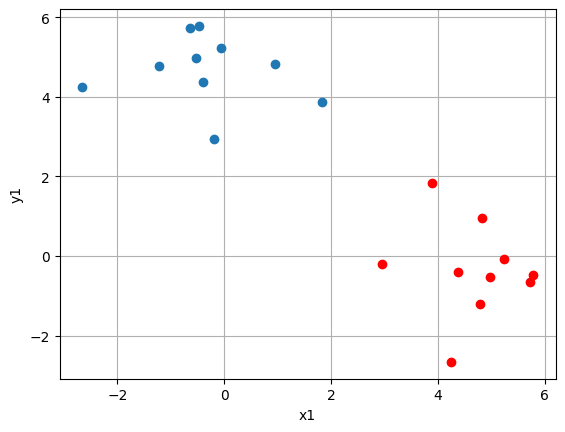

In [4]:
import matplotlib.pyplot as plt

plt.plot(class1_data[:, 0], class1_data[:,1],'o')
plt.plot(class2_data[:, 0], class2_data[:,1],'ro')

plt.xlabel('x1')
plt.ylabel('y1')
plt.grid()

### STEP2. 모델 만들기

In [13]:
from torch import nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()

    #case 1, plain
    self.linear = nn.Sequential(nn.Linear(2,100), # 인공신경망은 데이터 1개를 기준. (개X채)
                                nn.Sigmoid(),
                                nn.Linear(100, 1), # 이진 분류. 1에 가까운지 0에 가까운지만 알면 됨
                                nn.Sigmoid())
  def forward(self, x):
    return self.linear(x)


In [14]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 5개 데이터에 대한 각각의 출력값. 2개의 값으로 이루어진 좌표값 (x1, x2) 5개 입력한 상태임

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


## STEP 3. 모델 학습시키기

In [ ]:
# 유닛 스텝으로는 학습이 안되니까, 모든 구간에서 미분가능한 시그모이드를 활성화 함수로 사용
# 모든 웨이트에 대해 미분하고, 백워드 (오토그라드)

from torch import optim
import torch.nn.functional as F

LR = 1e-1
EPOCH = 100

optimizer = optim.SGD(model.parameters(), lr=LR)

loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH):
  # inference
  y_hat = model(X)
  # loss
  # 이진분류에 쓰이는 비용함수인 BCE는 내부적으로 nn.functional에 구현 되어있음
  # 사용자가 해야할 건 모델의 출력과 레이블만 던져주면 된다
   # -Sigma (log q^y (1-q)^1-y)
   # y_hat이 먼저 파라미터로 들어가야함!!
  loss = F.binary_cross_entropy(y_hat, y)

  # update
  loss.backward()
  optimizer.step() # 백워드해서 그라디언트 구하고 Optimzer에 step 메서드 해주면, 알아서 그라디언트 가지고 업데이트함

  loss_history += [loss.item()]




In [ ]:
h